In [13]:
import torch
import matplotlib.pyplot as plt
import numpy as np
print(torch.cuda.memory_allocated()/1024**2)


/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


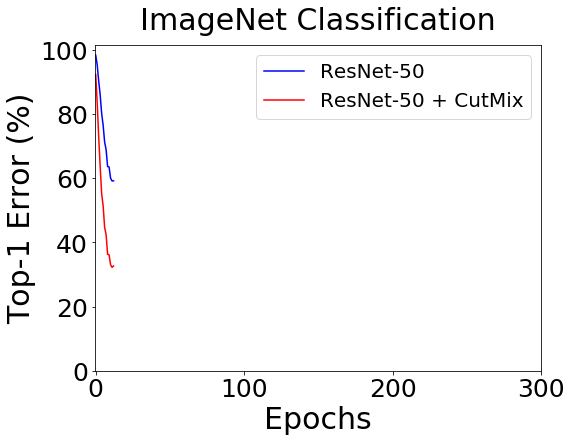

In [17]:

def plot(independent,dependent) :
    """
    global variable : features_list
    simple Linear Regresssion and plot it based on lag days.
    output : coefficient list
    """
        
    fig = plt.figure(figsize=(8,6))
    fig.set_facecolor('white')

    ax1 = fig.add_subplot()
    ax2 = fig.add_subplot()

    args_plot1 = [range(len(independent)), independent]
    args_plot2 = [range(len(dependent)), dependent]

    config_plot1 = dict(
        color='blue',
        linestyle='solid',
    )
    config_plot2 = dict(
        color='red',
        linestyle='solid',
    )

    ax1.plot(label='ResNet-50', *args_plot1, **config_plot1) ###<--- change label of plot graph
    ax2.plot(label='ResNet-50 + CutMix', *args_plot2, **config_plot2) ###<--- change label of plot graph
    
    ax1.legend(loc='upper right', fontsize=20, shadow=False) ## 범례 생성 - 그림자 효과 추가
    
    plt.ylabel('Top-1 Error (%)',rotation=90, fontsize=30) ###<--- change y-label of plot graph
    plt.xlabel('Epochs',fontsize=30) ## x축 라벨

    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25) ## y축 눈금 크기 설정
    ax1.set_xticks([0,100,200,300])
    ax1.set_yticks([0,20,40,60,80,100])

    plt.title(f"ImageNet Classification",fontsize=30, pad=15) ##<- change title of plot graph

    plt.show()


PATH = "../Training/12th_checkpoint.pt"
checkpoint = torch.load(PATH, map_location=torch.device('cpu'))

test1 = checkpoint['top1_err']
test2 = checkpoint['top5_err']

plot(test1, test2)